### Building a Linear Regression Model
- The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

## Attribute Information

### Input features in order:

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

### Output variable:

1) MEDV: Median value of owner-occupied homes in $1000's [k$]



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
boston = pd.read_csv(r"C:\Users\Samoei\Desktop\Data Science Project\boston.csv")

In [3]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Descriptive Analysis

In [4]:
boston.describe()## General descriptive analysis 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston.isna().sum() # Checking for missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- There are no missing values in the data set

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


- There are no categorical data in our data set

## Regression Equation 

- y = mx + c (simple linear regression)
- y is the dependent vvariable
- x is the independent vvariable. X can take more than 1 variable,i.e, there can be 2, 3 or 10 independent variables/predictors
- m is the slope of the line
- c is the constant
- y = m1x1 + m2x2 + m3x2 + c(multiple linear regression)

In [7]:
## Extracting the dependent and independent data
X = boston.drop(['MEDV'],axis=1) # dependent variable
y = boston["MEDV"] # indepedent variable

In [8]:
X.shape, y.shape

((506, 13), (506,))

# Data Processing 

## Univariate Analysis

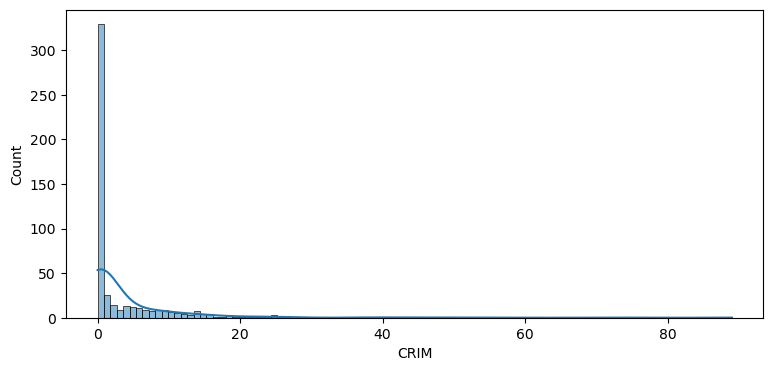

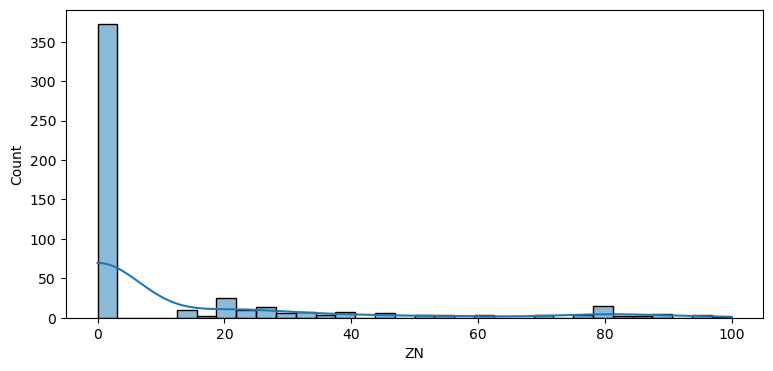

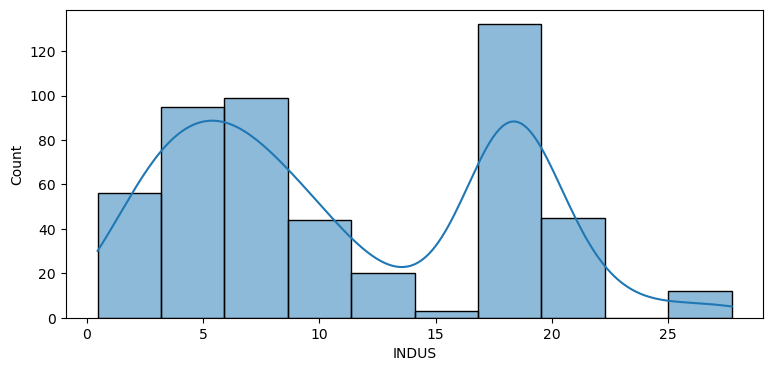

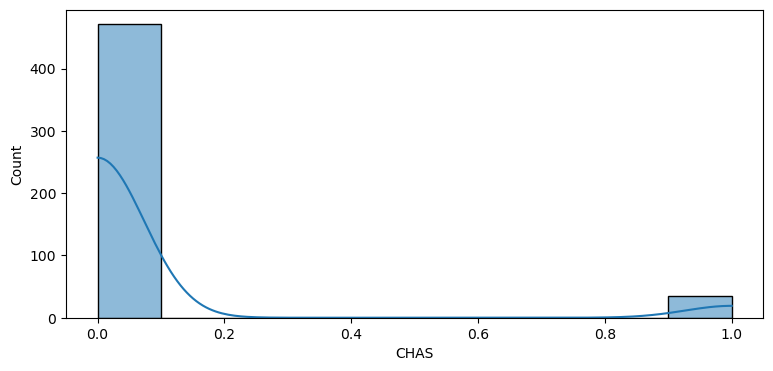

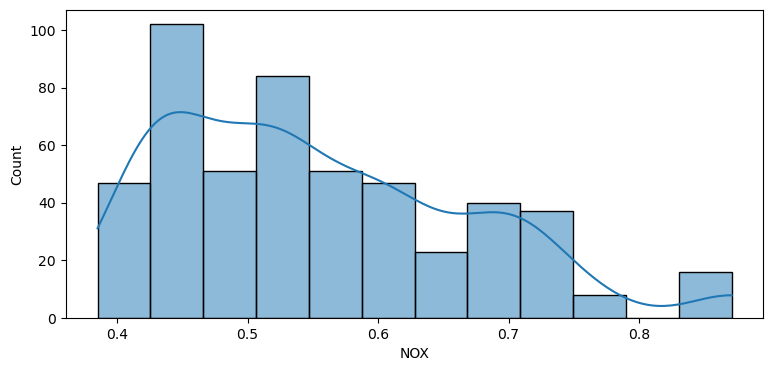

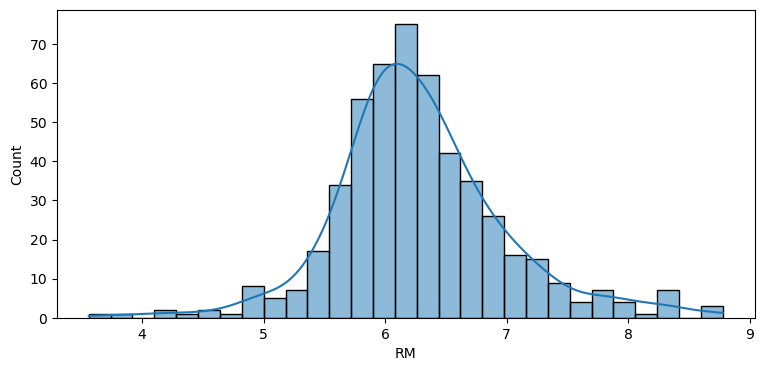

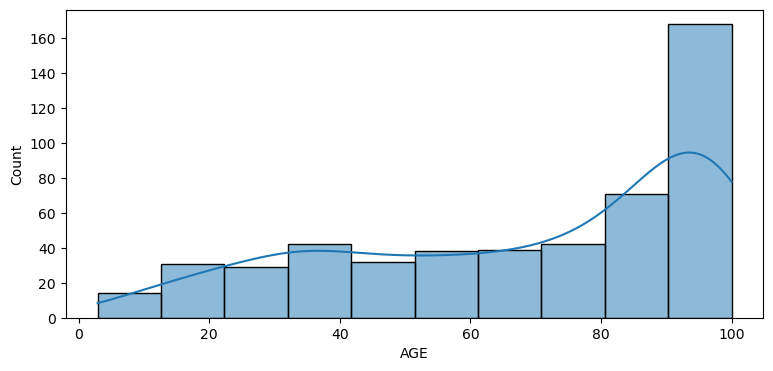

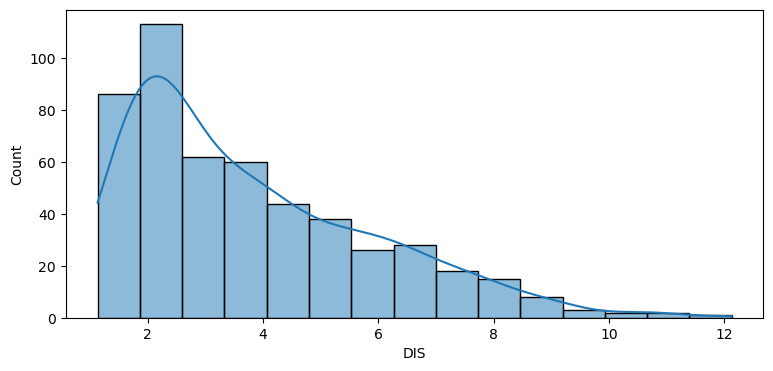

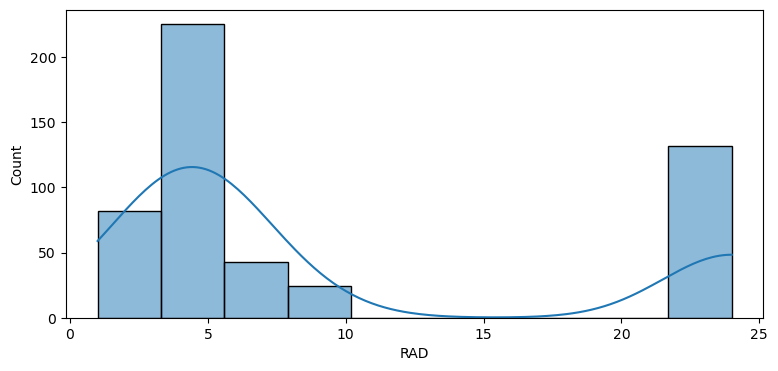

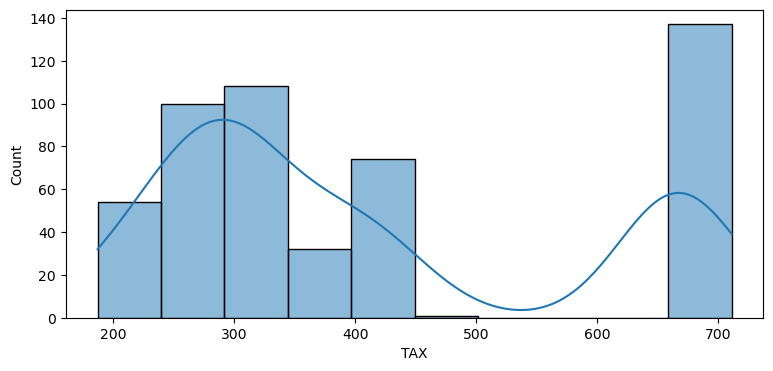

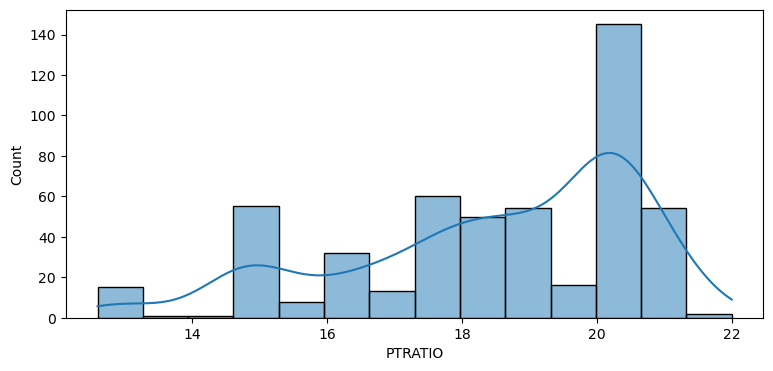

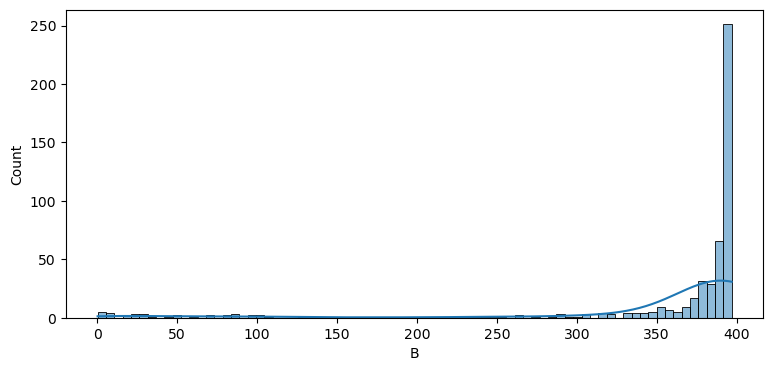

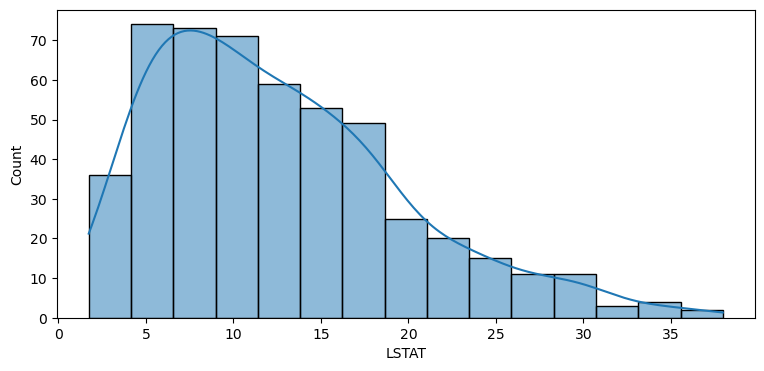

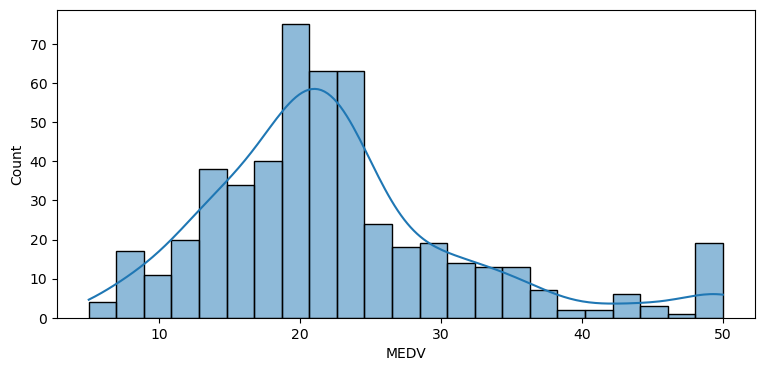

In [42]:
for i in boston.columns:
    plt.figure(figsize=(9,4))
    sns.histplot(data=boston,x=i,kde=True)
    plt.show()

Text(0.5, 0, 'RM')

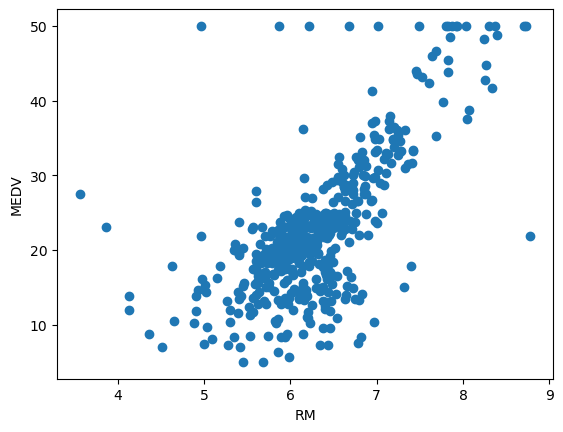

In [9]:
plt.scatter(data = boston,x="RM",y="MEDV")
plt.ylabel("MEDV")
plt.xlabel("RM")

Text(0.5, 0, 'LSTAT')

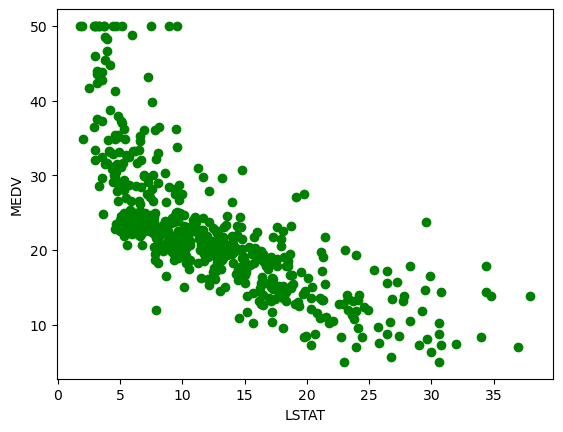

In [10]:
plt.scatter(data = boston,x="LSTAT",y="MEDV",color="g")
plt.ylabel("MEDV")
plt.xlabel("LSTAT")

- This is a negative correlation. An increase in % lower status of the population decreases the median value of owner-occupied homes 

Text(0.5, 0, 'PTRATIO')

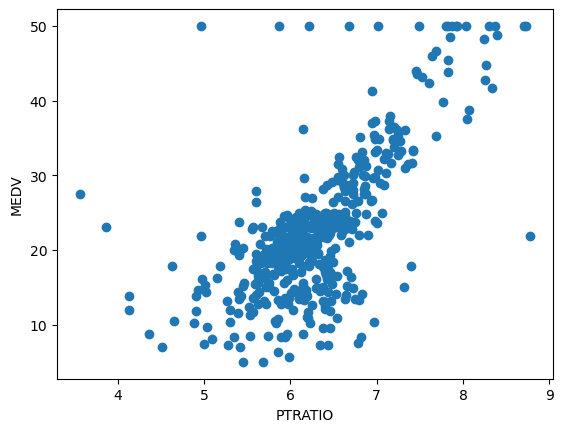

In [11]:
plt.scatter(data = boston,x="RM",y="MEDV")
plt.ylabel("MEDV")
plt.xlabel("PTRATIO")

## Correlation between Variables 

<AxesSubplot:>

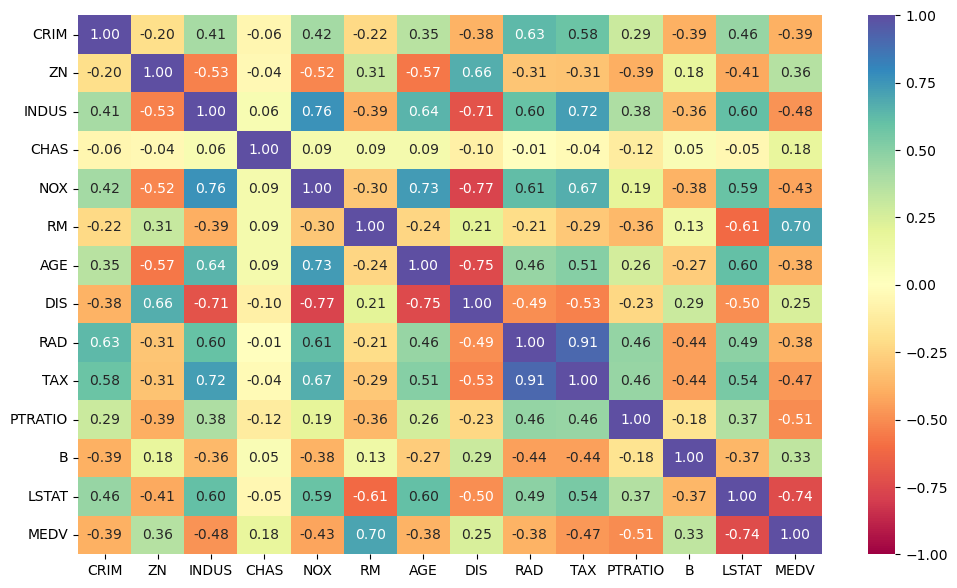

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(boston.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # checking the correlation between variables 

- RM (average number of rooms per dwelling) has the highest positive correlation (0.70) to MEDV 
- LSTAT(% lower status of the population) has the highest negative correlation (-0.74) to MEDV

## Building the model

In [13]:
# splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [14]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [15]:
#importing and defining the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred =  model.predict(X_test)
y_pred

array([32.65503184, 28.0934953 , 18.02901829, 21.47671576, 18.8254387 ,
       19.87997758, 32.42014863, 18.06597765, 24.42277848, 27.00977832,
       27.04081017, 28.75196794, 21.15677699, 26.85200196, 23.38835945,
       20.66241266, 17.33082198, 38.24813601, 30.50550873,  8.74436733,
       20.80203902, 16.26328126, 25.21805656, 24.85175752, 31.384365  ,
       10.71311063, 13.80434635, 16.65930389, 36.52625779, 14.66750528,
       21.12114902, 13.95558618, 43.16210242, 17.97539649, 21.80116017,
       20.58294808, 17.59938821, 27.2212319 ,  9.46139365, 19.82963781,
       24.30751863, 21.18528812, 29.57235682, 16.3431752 , 19.31483171,
       14.56343172, 39.20885479, 18.10887551, 25.91223267, 20.33018802,
       25.16282007, 24.42921237, 25.07123258, 26.6603279 ,  4.56151258,
       24.0818735 , 10.88682673, 26.88926656, 16.85598381, 35.88704363,
       19.55733853, 27.51928921, 16.58436103, 18.77551029, 11.13872875,
       32.36392607, 36.72833773, 21.95924582, 24.57949647, 25.14

## Model Validation

In [17]:
# Calculating the coefficients
print(model.coef_) 

[-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]


In [18]:
pd.DataFrame(model.coef_,index=X_train.columns,columns=["Coefficients"])

,Coefficients
CRIM,-0.112387
ZN,0.058059
INDUS,0.018359
CHAS,2.129978
NOX,-19.581101
RM,3.095462
AGE,0.004453
DIS,-1.500476
RAD,0.305359
TAX,-0.011123


In [19]:
#Calculating the intercept
print(model.intercept_)

42.93352585337733


## R Squared (Coefficient of Determination)

In [20]:
# Calculating R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7634174432138457

- The model has a R squared value of 76% which means that 76% of variability i the data can be explained by the model

## Mean Absolute Error(MAE)

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3.7507121808389177

## Mean Squared Error(MSE)

In [22]:
# Calculating mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

23.38083648027037

## Scatter Plot with regression line

<AxesSubplot:xlabel='MEDV'>

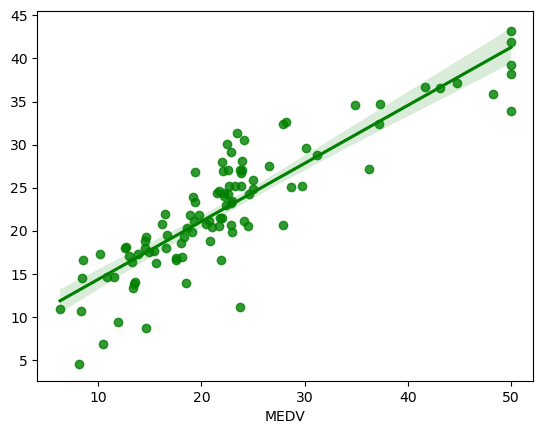

In [23]:
sns.regplot(y_test,y_pred,color="g")

## Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
scores = -(cross_val_score(model,X,y, cv=6, scoring = "neg_mean_absolute_error"))

In [26]:
scores

array([2.32449241, 3.95501349, 4.3970419 , 3.17457256, 7.61844605,
       3.90558336])

In [27]:
scores.mean()

4.229191625618

- The first model with default parameters has a smaller MAE. Therefore, we can use this model for prediction

#### Checking the residual errors

In [28]:
performance =pd.DataFrame({'Predictions':y_pred,"Actual Values":y_test})
performance['error']= (performance["Actual Values"]-performance["Predictions"])
performance.head(10)

,Predictions,Actual Values,error
307,32.655032,28.2,-4.455032
343,28.093495,23.9,-4.193495
47,18.029018,16.6,-1.429018
67,21.476716,22.0,0.523284
362,18.825439,20.8,1.974561
132,19.879978,23.0,3.120022
292,32.420149,27.9,-4.520149
31,18.065978,14.5,-3.565978
218,24.422778,21.5,-2.922778
90,27.009778,22.6,-4.409778


In [29]:
# Setting the index into an actual column
performance.reset_index(drop=True,inplace=True,)
performance.reset_index(inplace=True)
performance.head(10)

,index,Predictions,Actual Values,error
0,0,32.655032,28.2,-4.455032
1,1,28.093495,23.9,-4.193495
2,2,18.029018,16.6,-1.429018
3,3,21.476716,22.0,0.523284
4,4,18.825439,20.8,1.974561
5,5,19.879978,23.0,3.120022
6,6,32.420149,27.9,-4.520149
7,7,18.065978,14.5,-3.565978
8,8,24.422778,21.5,-2.922778
9,9,27.009778,22.6,-4.409778


Text(0, 0.5, 'Residuals')

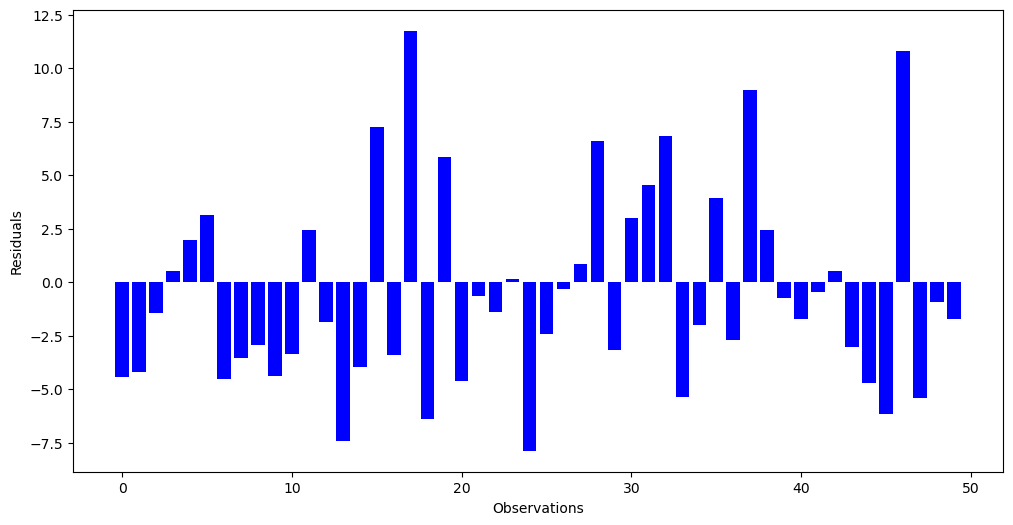

In [30]:
# Plotting a bar chart to visualize the residuals
plt.figure(figsize=(12,6))
plt.bar('index','error',data=performance[:50], color='b') # This reduces the number of observations to 50 for better visualization
plt.xlabel("Observations")
plt.ylabel("Residuals")

- A good model has shorter bars

In [31]:
#import os
#import nbformat
#from nbconvert import HTMLExporter
#from nbconvert.preprocessors import ExecutePreprocessor

#nb_path = 'C:\\Users\\Samoei\Desktop\\Data Science Project\\Assignment2_boston.ipynb'
#with open(nb_path) as f:
 #   nb = nbformat.read(f, as_version=4)

#ep = ExecutePreprocessor(kernel_name='python3')
#ep.preprocess(nb)
#exporter = HTMLExporter()
#html, _ = exporter.from_notebook_node(nb)

#output_html_file = f"C:\\Users\\Samoei\\Desktop\\Data Science Project\\Assignment2_boston.html"
#with open(output_html_file, "w") as f:
 #   f.write(html)
  #  f.close()
#print(f"Result HTML file: {output_html_file}")

In [32]:
import os
import nbformat
from nbconvert import HTMLExporter
with open("C:\Users\Samoei\Desktop\Data Science Project\Assignment2_boston.ipynb", 'r') as f:
    nb = nbformat.reads(f.read(), as_version=4)

#Create an html exporter
htmlexporter = HTMLExporter()
# htmlexporter.template_file = 'basic'

#Write the generated html to a file
with open("C:\Users\Samoei\Desktop\Data Science Project\Assignment2_boston.html", 'w') as f:
    f.write(htmlexporter.from_notebook_node)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2848347925.py, line 4)